In [103]:
# Import packages and load the data
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as sts
import pandas as pd

#Load data
income = np.loadtxt('usincmoms.txt')


<IPython.core.display.Javascript object>


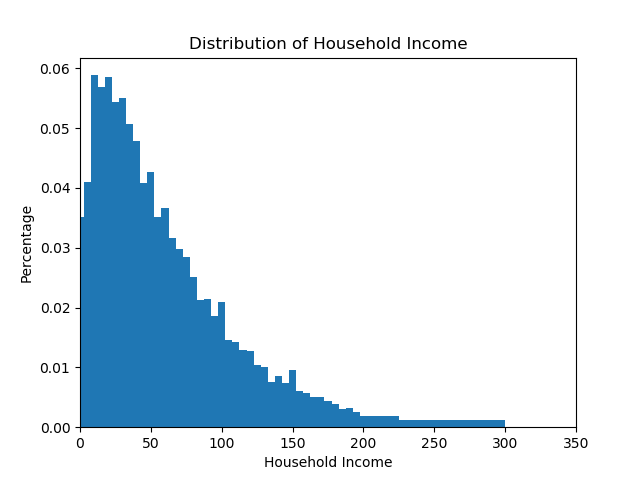

(0, 350)

In [141]:
#part a:
#First, we draw a histogram
%matplotlib notebook

histincome = pd.DataFrame(income)
histincome.columns = ['percentage', 'midpt']
histincome['max'] = histincome['midpt']+2500
histincome['min'] = histincome['midpt']-2500
histincome.loc[40,'min'] = 200000
histincome.loc[40,'max'] = 250000
histincome.loc[41,'min'] = 250000
histincome.loc[41,'max'] = 350000
histincome['bin'] = (histincome['max'] - histincome['min'])/1000
histincome.loc[40,'percentage'] = histincome.loc[40,'percentage']/10
histincome.loc[41,'percentage'] = histincome.loc[41,'percentage']/20

plt.bar(histincome['min']/1000, histincome['percentage'], histincome['bin'])
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Percentage')
plt.xlim([0,350])


In [41]:
#part b

lower=np.append(income[0:40,1]/1000-2.5, [income[40,1]/1000-25,income[41,1]/1000-50])
upper=np.append(income[0:40,1]/1000+2.5, [income[40,1]/1000+25,income[41,1]/1000+50])

def model_moments(mu, sigma):
    prob_low=sts.lognorm.cdf(lower, sigma, scale=np.exp(mu))
    prob_up=sts.lognorm.cdf(upper, sigma, scale=np.exp(mu))
    return prob_up-prob_low

def err_vec(xvals, mu, sigma):
    moms_data=xvals[:,0]
    moms_model=model_moments(mu, sigma)
    err_vec = moms_model - moms_data
    return err_vec

def critlgnorm(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma)
    crit_val = err.T @ W @ err
    return crit_val



In [42]:
#find optimals, using suggested mu_0 and sigma_0 
mu_0 = np.log(income.mean())
print (mu_0)
sigma_0 = np.log(income.std())
print (sigma_0)
params_0 = np.array([mu_0, sigma_0])

W = np.diag(income[:,0])
gmm_args = (income, W)
result1 = opt.minimize(critlgnorm, params_0, args = (gmm_args), method = 'L-BFGS-B', bounds = ((None, None), (1e-10, None)))
mu_gmm1, sigma_gmm1 = result1.x
print(result1)
                                                                                            

10.8943115573
11.1782536766
      fun: 3.5230053585546136e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.98225022e-06,  -2.56798028e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 105
      nit: 16
   status: 0
  success: True
        x: array([ 3.95372273,  1.02271787])


<IPython.core.display.Javascript object>


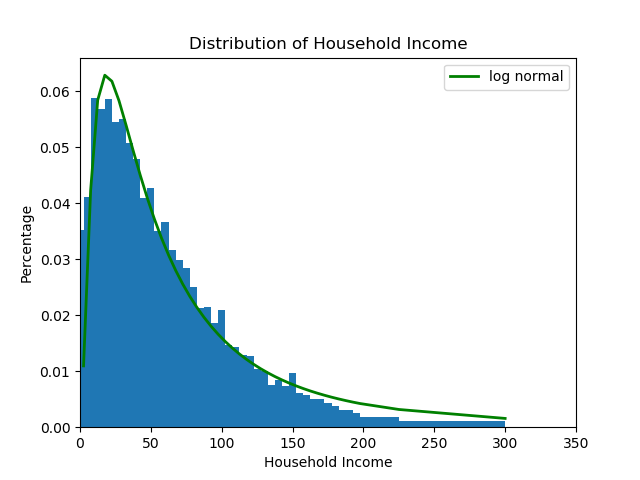

In [80]:
#show how distribution fits
%matplotlib notebook
plt.bar(histincome['min']/1000, histincome['percentage'], histincome['bin'])
plt.xlim([0,350])

modelmoments = model_moments(mu_gmm1, sigma_gmm1)
modelmoments[40] = modelmoments[40]/10
modelmoments[41] = modelmoments[41]/20
plt.plot(histincome['midpt']/1000,modelmoments,
         linewidth=2, color='g', label='log normal')
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Percentage')
plt.legend(loc='upper right')

In [50]:
#part c using gamma distribution
def modmoms_ga(alpha,beta):
    prob_up = sts.gamma.cdf(upper, alpha, scale = beta)
    prob_low = sts.gamma.cdf(lower, alpha, scale = beta)
    return prob_up - prob_low

def err_vec_ga(xvals, alpha, beta):
    moms_data = xvals[:,0]
    moms_model = modmoms_ga(alpha,beta)
    err_vec = moms_model - moms_data
    return err_vec

def crit_ga(params, *args):
    alpha, beta = params
    xvals, W = args
    err = err_vec_ga(xvals, alpha, beta)
    crit_val = err.T@ W @ err
    return crit_val

In [51]:
#find optimals, using suggested alpha_0 and beta_0 
alpha_0 = 3
beta_0 = 20
paramsga_0 = np.array([alpha_0, beta_0])

W = np.diag(income[:,0])
gmm_args = (income, W)
result2 = opt.minimize(crit_ga, paramsga_0, args = (gmm_args), method = 'L-BFGS-B', bounds = ((None, None), (None, None)))
alpha_gmm2, beta_gmm2 = result2.x
print(result2)

      fun: 1.4738343717205143e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.00827986e-06,  -1.48778932e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 9
   status: 0
  success: True
        x: array([  1.50297859,  41.2929954 ])


<IPython.core.display.Javascript object>


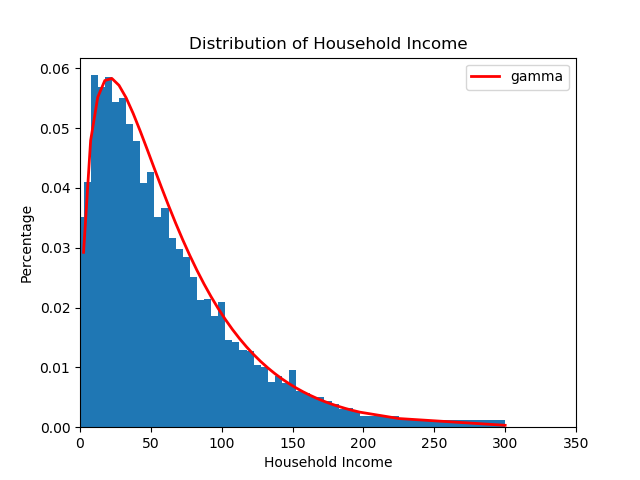

In [78]:
#show how distribution fits
%matplotlib notebook
plt.bar(histincome['min']/1000, histincome['percentage'], histincome['bin'])
plt.xlim([0,350])
modmosGA = modmoms_ga(alpha_gmm2, beta_gmm2)
modmosGA[40] = modmosGA[40]/10
modmosGA[41] = modmosGA[41]/20
plt.plot(histincome['midpt']/1000,modmosGA,
         linewidth=2, color='r', label='gamma')
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Percentage')
plt.legend(loc='upper right')



<IPython.core.display.Javascript object>


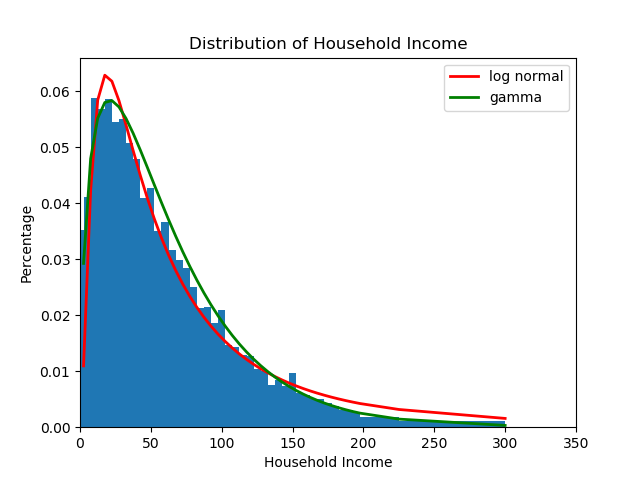

In [81]:
#part d
%matplotlib notebook
plt.bar(histincome['min']/1000, histincome['percentage'], histincome['bin'])
plt.xlim([0,350])

plt.plot(histincome['midpt']/1000,modelmoments,
         linewidth=2, color='r', label='log normal')
plt.plot(histincome['midpt']/1000,modmosGA,
         linewidth=2, color='g', label='gamma')
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.show()
#from this graph, we can see that the green line fits the data better. 
#The red line overestimate the peak data from 0 to 50. 
#It under-estimate the data from 50 to 150, and then overestimate the data from 150 to 350.

In [22]:
#Let's try to compare the two distributions's criterion value
obj_ln=result1.fun
obj_ga=result2.fun
print('objective value of lognormal=',obj_ln)
print('objective value of gamma=',obj_ga)

#From the results, we can see that gamma distribution has a lower value, and is a better fit.

objective value of lognormal= 3.52300535855e-05
objective value of gamma= 1.47383437172e-05


In [120]:
#part e, using two steps to estimate
import numpy.linalg as lin
#first step
W_0 = np.eye(42)
alpha_0 = 3.0
beta_0 = 20.0
paramsga_0 = np.array([alpha_0, beta_0])
gmm_args = (income, W_0)
result3 = opt.minimize(crit_ga, paramsga_0, args=(gmm_args),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
alpha_gmm3, beta_gmm3 = result3.x
print('alpha_gmm3=', alpha_gmm3, ' beta_gmm3=', beta_gmm3)

#second step
err1 = err_vec_ga(income, alpha_gmm3, beta_gmm3)
err2=np.reshape(err_vec_ga(income, alpha_gmm3, beta_gmm3),(42,1))
VCV2 = (err2 @ err2.T) / income.shape[0]
W_hat2 = lin.pinv(VCV2)

gmm_2step = (income, W_hat2)
result4 = opt.minimize(crit_ga, paramsga_0, args=(gmm_2step),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
alpha_gmm4, beta_gmm4 = result4.x
print('alpha_gmm4=', alpha_gmm4, ' beta_gmm4=', beta_gmm4)
print(result4)

alpha_gmm3= 1.37654320437  beta_gmm3= 48.0666983741
alpha_gmm4= 1.76194204928  beta_gmm4= 19.9571678354
      fun: 2.1999714312064282e-14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.72138307e-06,  -2.88897273e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([  1.76194205,  19.95716784])


<IPython.core.display.Javascript object>


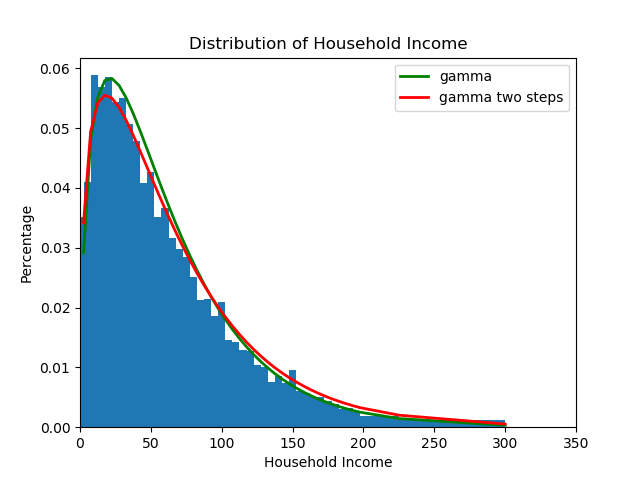

In [122]:
#draw a graph to compare c and e

%matplotlib notebook
plt.bar(histincome['min']/1000, histincome['percentage'], histincome['bin'])
plt.xlim([0,350])

modmostwo = modmoms_ga(alpha_gmm3, beta_gmm3)
modmostwo[40] = modmostwo[40]/10
modmostwo[41] = modmostwo[41]/20

plt.plot(histincome['midpt']/1000,modmosGA,
         linewidth=2, color='g', label='gamma')
plt.plot(histincome['midpt']/1000,modmostwo,
         linewidth=2, color='r', label='gamma two steps')
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.show()
#It is a little hard to see which fits better from the graph. 

In [91]:
#problem 2
#part a
data = pd.read_csv('MacroSeries.txt',sep=',',header=None,names=['c_t','k_t','w_t','r_t'])

In [92]:
#back out zt from formula 4
def ztseries(r_t,k_t,alpha):
    return np.log(r_t/((alpha) * k_t ** (alpha-1)))  
    
def eqn6(z_t, z_t1, rho, mu):  
    return z_t1-(rho*z_t + (1-rho)*mu)

def eqn7(z_t, z_t1, rho, mu): 
    return (z_t1-(rho*z_t + (1-rho)*mu))*z_t

def eqn8(z_t1,k_t1,c_t,c_t1,alpha,beta):
    return (beta*alpha*np.exp(z_t1)*(k_t1**(alpha-1))*c_t/c_t1) -1

def eqn9 (z_t1,k_t1,c_t,c_t1,alpha,beta, w_t):
    return((beta*alpha*np.exp(z_t1)*(k_t1**(alpha-1))*c_t/c_t1) -1)*w_t

def GMM_err(alpha, beta, rho, mu,r_t,k_t,c_t,w_t):
    z_t = ztseries(r_t,k_t,alpha)
    z_t1 = z_t.shift(-1)  
    r_t1 = r_t.shift(-1)
    c_t1 = c_t.shift(-1)
    k_t1 = k_t.shift(-1)
    r_t1 = r_t.shift(-1)
    errors = np.array([np.mean(eqn6(z_t, z_t1, rho, mu)),np.mean(eqn7(z_t, z_t1, rho, mu)),np.mean(eqn8(z_t1,k_t1,c_t,c_t1,alpha,beta)),np.mean(eqn9(z_t1,k_t1,c_t,c_t1,alpha,beta, w_t))])
    return errors

In [93]:
def GMM_crit(params, *args):
    
    alpha,beta,rho,mu = params
    c_t,k_t,w_t,r_t,W = args
    
    err = GMM_err(alpha,beta,rho,mu,c_t,k_t,w_t,r_t)
    return err.T @ W @ err

In [99]:
#initial guesses for alpha, beta, rho, mu
alpha_0, beta_0, rho_0, mu_0 = 0.5,1,0.5,1
params_init = np.array([alpha_0,beta_0,rho_0,mu_0])
W_0 = np.eye(4)
GMM_args = (data['r_t'],data['k_t'],data['c_t'],data['w_t'],W_0)
bound = ((1e-10,1-1e-10),(1e-10,1-1e-10),(-1+1e-10,1-1e-10),(1e-10,None))

results1 = opt.minimize(GMM_crit,params_init,args=(GMM_args),method='L-BFGS-B',bounds=bound,tol=1e-12)
alpha_1,beta_1,rho_1,mu_1 = results1.x
results1

      fun: 0.002703838314679101
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.79562480e-01,   4.76480182e+04,  -1.38489190e-03,
        -1.10285120e-02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 315
      nit: 38
   status: 0
  success: True
        x: array([ 0.93850322,  0.99      ,  0.70012273,  1.01315268])